# Lab 0 - Prerequisites

## Using `matplotlib`, `numpy` and other Python modules to generate and play audio signals

In this preliminary lab we will setup all the tools and start "playing" with Python.

To start executing this notebook, you need to install a few extra packages.

In [1]:
# standard python libs for math, signal processing and plotting
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.io.wavfile as wav

# for this to work you need to run on your terminal
# (Anaconda prompt on Windows, standard terminal on MacOS):
# `pip install simpleaudio`
import simpleaudio as sa

# similarly run `pip install tftb` for the following
from tftb.processing import Spectrogram   # computes a time-frequency "map" of a signal

# interactive plots enabled
#%matplotlib notebook
# with the following, the plots are opened as separate windows in full resolution
#%matplotlib

fs = 44100        # sampling frequency in audio cards is 44.1 kHz for CD-quality audio

In [2]:
import simpleaudio.functionchecks as fc

fc.LeftRightCheck.run()


-- LeftRightCheck --
Checks stereo playback by first playing a note in the left channel only,
then a different note in the right channel only.

Starting check in ...
3 ...
2 ...
1 ...
RUNNING CHECK ...
... DONE


### 1. Generate and play sounds

#### a. Generate a simple sine wave

In [3]:
frequency = 440  # note frequency
seconds = 1.5    # note duration

# Generate a numpy array with seconds*sample_rate steps, ranging between 0 and seconds
t = np.linspace(0, seconds, int(seconds * fs), False)

# Generate a sine wave
note = np.sin(frequency * t * 2 * np.pi)

# Ensure that highest value is in 16-bit range
audio = note * (2**15 - 1) / np.max(np.abs(note))
# Convert to 16-bit data
audio = audio.astype(np.int16)

# Start playback
play_obj = sa.play_buffer(audio, 1, 2, fs)

# Wait for playback to finish before exiting
play_obj.wait_done()

In [3]:
# This is how we save the generated wave as a .wav file
wav.write('lab0.wav', fs, audio)   # try int(fs/2) or fs*2 instead of fs

#### b. Play two sounds at the same time

In [4]:
note2 = np.sin(frequency * t * 3 * np.pi)
audio2 = note2 * (2**15 - 1) / np.max(np.abs(note2))
# Convert to 16-bit data
audio2 = audio2.astype(np.int16)

# Play both at the same time: each call to play_buffer()
# is asynchronous and returns immediately
play_obj = sa.play_buffer(audio, 1, 2, fs)
play_obj = sa.play_buffer(audio2, 1, 2, fs)
play_obj.wait_done()

### 2. Analyze a real sound from a `.wav` file

In [5]:
fileaudio = wav.read('Do centrale piano.wav')
datanp = np.array(fileaudio[1], dtype=float)
print("Number of samples: %d. Sampling frequency: %d Hz" % (datanp.size, fileaudio[0]))

Number of samples: 485056. Sampling frequency: 44100 Hz


In [6]:
audio = datanp * (2**15 - 1) / np.max(np.abs(datanp))
audio = audio.astype(np.int16)
play_obj = sa.play_buffer(audio, 1, 2, fileaudio[0])

Now we define a function that we can reuse later.

We want to plot a given signal both in the time domain and in the frequency domain. This function takes a numpy array `s`, containing the samples of our signal $s(t)$, and a `duration` in seconds, and plots the time evolution of _s(t)_ as well as the power spectral density $W(f) = |S(f)|^2$. Note that the latter is a log/log plot.

In [9]:
samples = 524288
def plottimefreq(s, duration):
    # plot the time series of the signal s
    plt.subplots(figsize=(25, 5)) 
    ax = plt.subplot(1, 2, 1)
    plt.plot(np.real(s))
    plt.xlim(0)
    ax.set_xlabel('t [ms]')
    maxx = int(duration*10 + 1)*100
    ax.set_xticks(np.arange(0, maxx*fs/1000, maxx*fs/10000, dtype=int))
    ax.set_xticklabels(np.arange(0, maxx, maxx/10, dtype=int))
    plt.grid(which='major')
    plt.title("Wave packet")

    # also compute and plot the power spectral density
    ax2 = plt.subplot(1, 2, 2)
    s = np.pad(s, (0, samples-s.size), mode='constant')
    W = np.abs(np.fft.fft(s) ** 2)
    f = np.fft.fftfreq(s.size, 1/fs)
    plt.plot(f, W)
    plt.xlim(20, 10000)
    #formatter = LogFormatter(labelOnlyBase=False, minor_thresholds=(1, 0.1))
    #ax.get_xaxis().set_minor_formatter(formatter)
    ax2.set_xlabel('f [Hz]')
    plt.ylim(1E-4)
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(which='both')
    plt.title("Power spectral density (log/log)")
    plt.show()

/var/folders/ph/g456gc991px8lyhvf4h_vnzh0000gn/T/ipykernel_9100/4199712084.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, 2, 1)


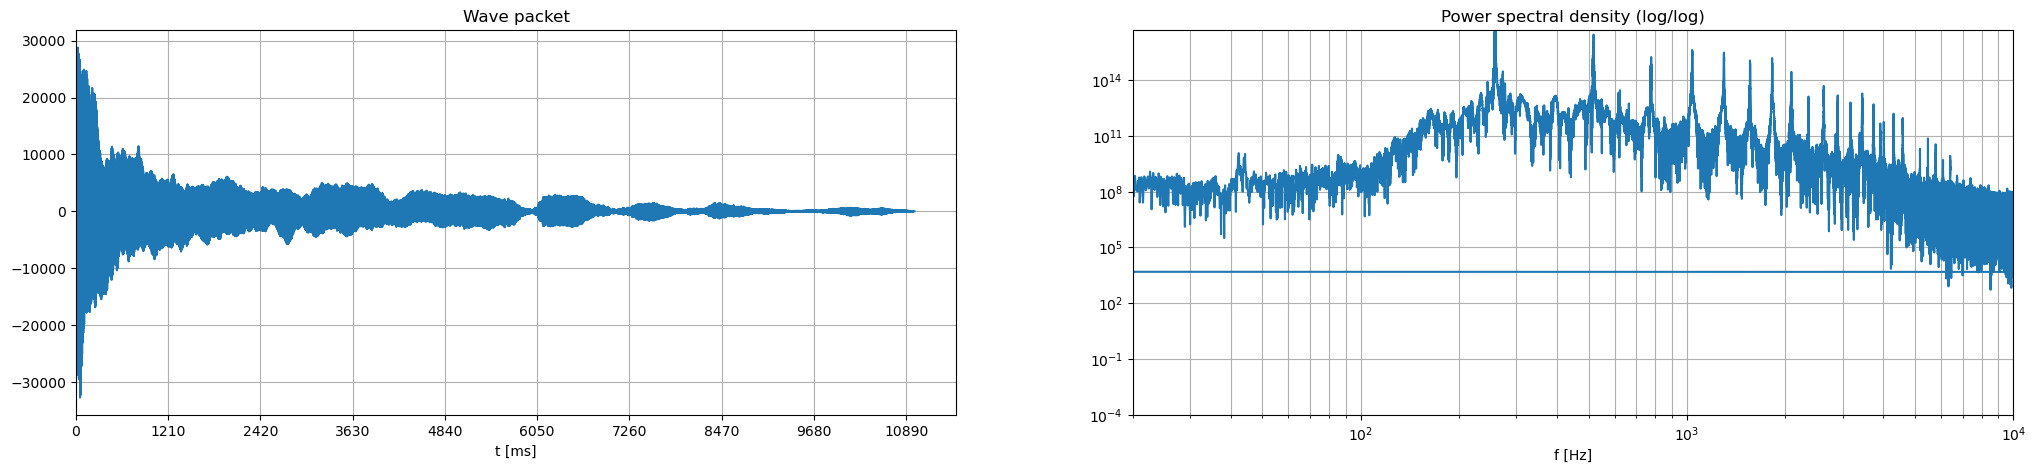

In [10]:
# draw the plots for the Do wav file
plottimefreq(datanp, 12)